### Import important libraries

In [429]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns

### Read the dataset

In [430]:
df = pd.read_csv("Covid19_vaccinations.csv")

### Check basic information of the dataset

In [431]:
df.head()

,country,iso_code,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million,vaccines,source_name,source_website
0,Afghanistan,AFG,2021-02-22,0.0,0.0,NaN,NaN,NaN,0.0,0.0,NaN,NaN,"BBIBP-CorV, Oxford/AstraZeneca, Pfizer/BioNTech",World Health Organization,https://covid19.who.int/
1,Afghanistan,AFG,2021-02-23,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,35.0,"BBIBP-CorV, Oxford/AstraZeneca, Pfizer/BioNTech",World Health Organization,https://covid19.who.int/
2,Afghanistan,AFG,2021-02-24,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,35.0,"BBIBP-CorV, Oxford/AstraZeneca, Pfizer/BioNTech",World Health Organization,https://covid19.who.int/
3,Afghanistan,AFG,2021-02-25,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,35.0,"BBIBP-CorV, Oxford/AstraZeneca, Pfizer/BioNTech",World Health Organization,https://covid19.who.int/
4,Afghanistan,AFG,2021-02-26,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,35.0,"BBIBP-CorV, Oxford/AstraZeneca, Pfizer/BioNTech",World Health Organization,https://covid19.who.int/


In [432]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25862 entries, 0 to 25861
Data columns (total 15 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   country                              25862 non-null  object 
 1   iso_code                             25862 non-null  object 
 2   date                                 25862 non-null  object 
 3   total_vaccinations                   14522 non-null  float64
 4   people_vaccinated                    13762 non-null  float64
 5   people_fully_vaccinated              11041 non-null  float64
 6   daily_vaccinations_raw               12003 non-null  float64
 7   daily_vaccinations                   25595 non-null  float64
 8   total_vaccinations_per_hundred       14522 non-null  float64
 9   people_vaccinated_per_hundred        13762 non-null  float64
 10  people_fully_vaccinated_per_hundred  11041 non-null  float64
 11  daily_vaccinations_per_milli

In [433]:
df.isnull().sum()

country                                    0
iso_code                                   0
date                                       0
total_vaccinations                     11340
people_vaccinated                      12100
people_fully_vaccinated                14821
daily_vaccinations_raw                 13859
daily_vaccinations                       267
total_vaccinations_per_hundred         11340
people_vaccinated_per_hundred          12100
people_fully_vaccinated_per_hundred    14821
daily_vaccinations_per_million           267
vaccines                                   0
source_name                                0
source_website                             0
dtype: int64

In [434]:
df.duplicated().sum()

0

### Create a datetime index

In [435]:
df['date'] = pd.to_datetime(df['date'],)
df = df.set_index('date')
df.head()

,country,iso_code,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million,vaccines,source_name,source_website
date,,,,,,,,,,,,,,
2021-02-22,Afghanistan,AFG,0.0,0.0,NaN,NaN,NaN,0.0,0.0,NaN,NaN,"BBIBP-CorV, Oxford/AstraZeneca, Pfizer/BioNTech",World Health Organization,https://covid19.who.int/
2021-02-23,Afghanistan,AFG,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,35.0,"BBIBP-CorV, Oxford/AstraZeneca, Pfizer/BioNTech",World Health Organization,https://covid19.who.int/
2021-02-24,Afghanistan,AFG,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,35.0,"BBIBP-CorV, Oxford/AstraZeneca, Pfizer/BioNTech",World Health Organization,https://covid19.who.int/
2021-02-25,Afghanistan,AFG,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,35.0,"BBIBP-CorV, Oxford/AstraZeneca, Pfizer/BioNTech",World Health Organization,https://covid19.who.int/
2021-02-26,Afghanistan,AFG,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,35.0,"BBIBP-CorV, Oxford/AstraZeneca, Pfizer/BioNTech",World Health Organization,https://covid19.who.int/


### Plotting the heatmap of correlation between features

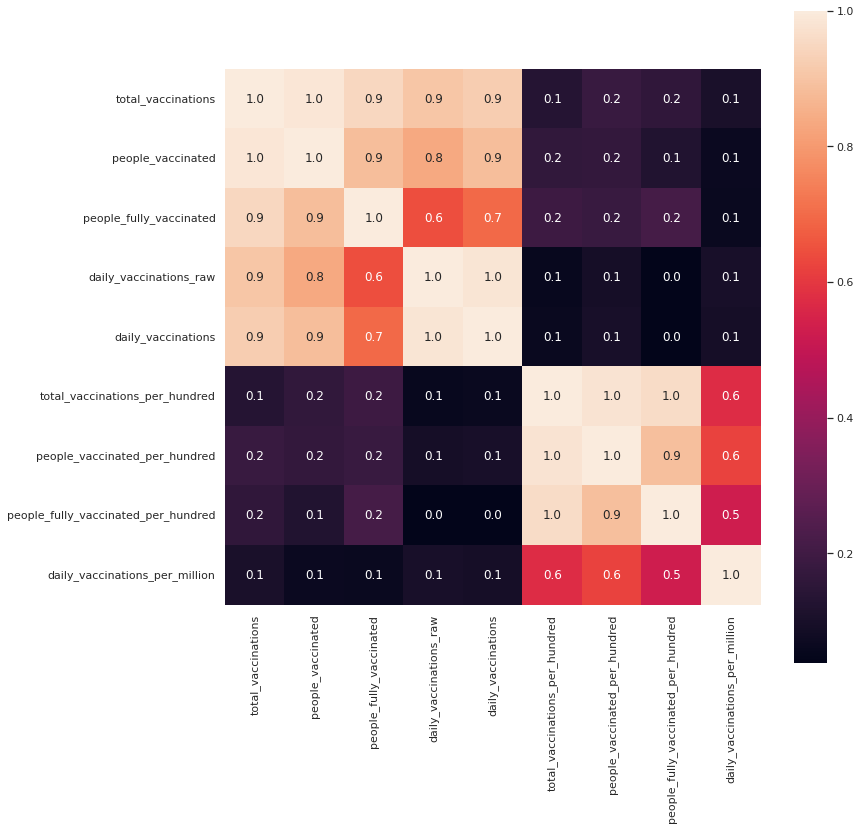

In [436]:
plt.figure(figsize=(12,12))
sns.heatmap(df.corr(), cbar=True, square= True, fmt='.1f', annot=True, annot_kws={'size':12})

### **Basic Questions**
### Total number of vaccinations by country

In [437]:
df2= pd.DataFrame(df.groupby("country")["daily_vaccinations"].sum())
df2.columns=['total vaccinations']
df2.head()

,total vaccinations
country,
Afghanistan,655744.0
Albania,861947.0
Algeria,2437370.0
Andorra,46601.0
Angola,1342597.0


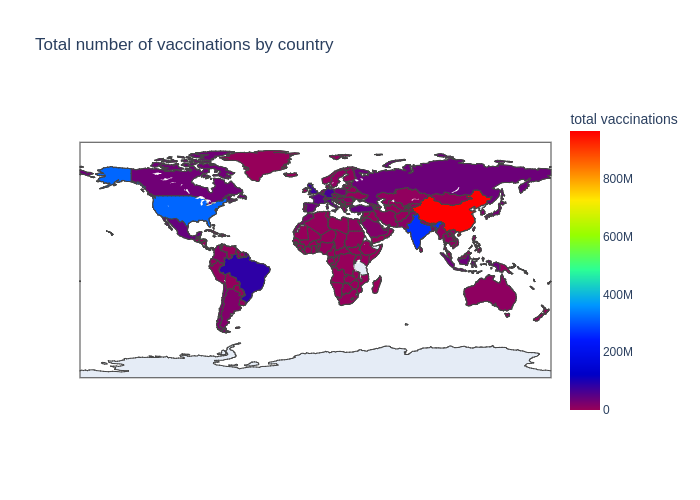

In [438]:
fig = px.choropleth(df2, locations=df2.index,
                    color=df2['total vaccinations'],
                    locationmode='country names',
                    hover_name=df2.index,
                    color_continuous_scale=px.colors.sequential.Rainbow,
                    title='Total number of vaccinations by country')
fig.show('png')

### Which Country has most total vaccinations?

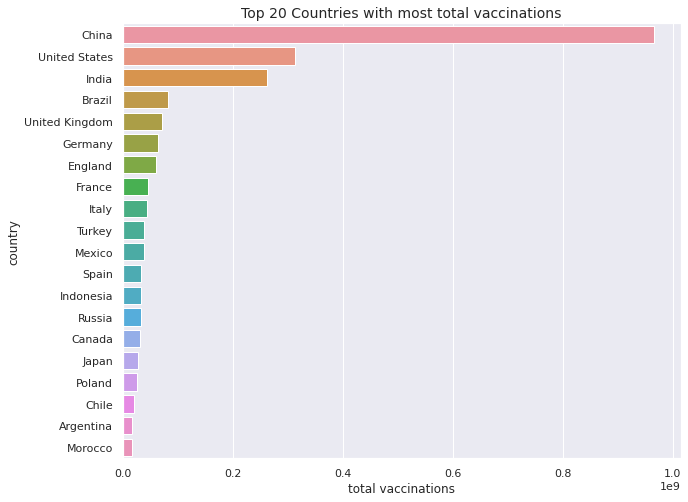

In [439]:
df3=df2.sort_values(by='total vaccinations',ascending=False)
plt.figure(figsize=(10,8))
sns.barplot(data=df3[0:20],y=df3.index[0:20],x='total vaccinations')
plt.title("Top 20 Countries with most total vaccinations",fontsize=14)
plt.show()

### Which Country has most people fully vaccinated?

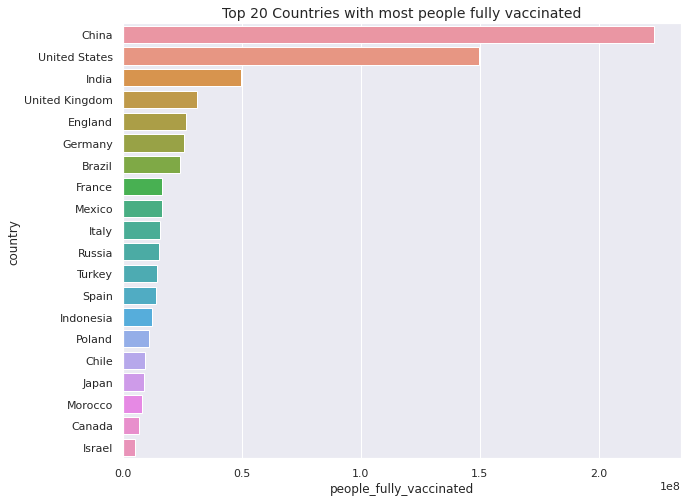

In [440]:
df4= pd.DataFrame(df.groupby("country")["people_fully_vaccinated"].max())
df5=df4.sort_values(by='people_fully_vaccinated',ascending=False)
plt.figure(figsize=(10,8))
sns.barplot(data=df5[0:20],y=df5.index[0:20],x='people_fully_vaccinated')
plt.title("Top 20 Countries with most people fully vaccinated",fontsize=14)
plt.show()

### Which Country has highest percentage of people fully vaccinated?

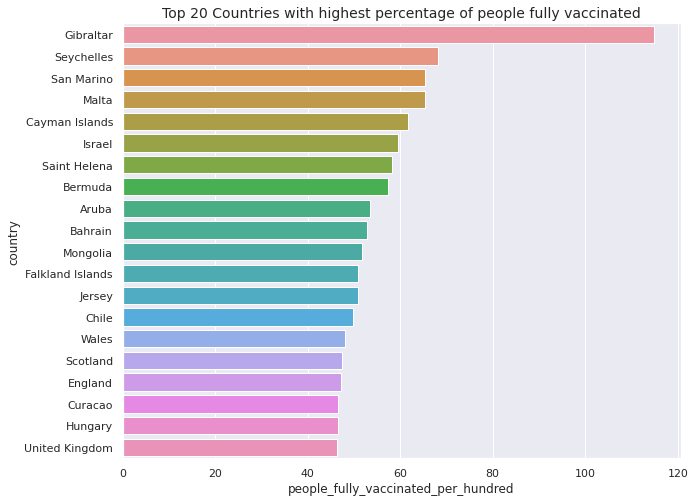

In [441]:
df6= pd.DataFrame(df.groupby("country")["people_fully_vaccinated_per_hundred"].max())
df7=df6.sort_values(by='people_fully_vaccinated_per_hundred',ascending=False)
df8=df6.sort_values(by='people_fully_vaccinated_per_hundred')
plt.figure(figsize=(10,8))
sns.barplot(data=df7[0:20],y=df7.index[0:20],x='people_fully_vaccinated_per_hundred')
plt.title("Top 20 Countries with highest percentage of people fully vaccinated",fontsize=14)
plt.show()

### Which Country has lowest percentage of people fully vaccinated?

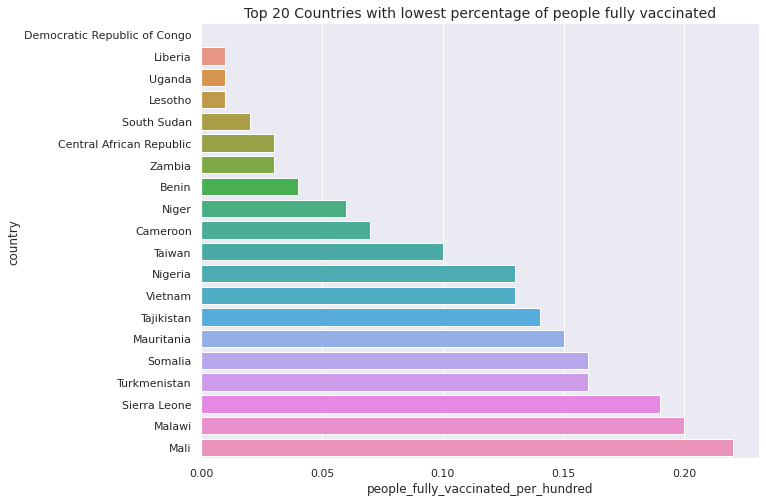

In [442]:
plt.figure(figsize=(10,8))
sns.barplot(data=df8[0:20],y=df8.index[0:20],x='people_fully_vaccinated_per_hundred')
plt.title("Top 20 Countries with lowest percentage of people fully vaccinated",fontsize=14)
plt.show()

### Pie Chart Representation of people fully vaccinated across countries

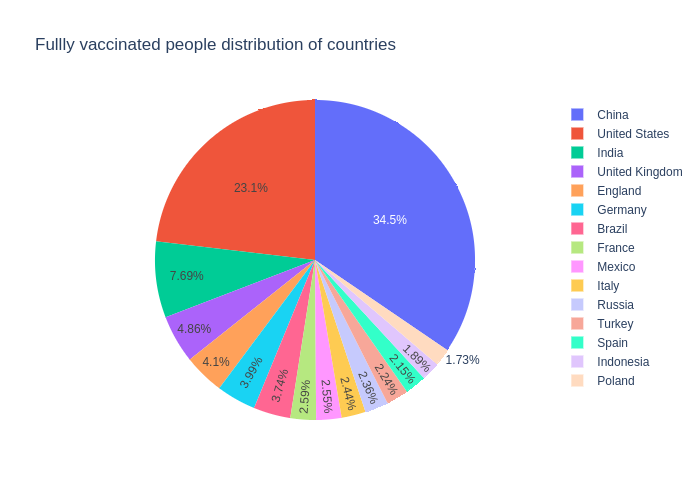

In [443]:
labels=df5.index[0:15].values
fig=px.pie(df5[0:15],values='people_fully_vaccinated',names=labels,title="Fullly vaccinated people distribution of countries".format('Country'))
fig.show('png')

### Vaccination progress of the United States



In [444]:
df9= df.loc[df['iso_code']=='USA']
df9.head()

,country,iso_code,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million,vaccines,source_name,source_website
date,,,,,,,,,,,,,,
2020-12-20,United States,USA,556208.0,556208.0,NaN,NaN,NaN,0.17,0.17,NaN,NaN,"Johnson&Johnson, Moderna, Pfizer/BioNTech",Centers for Disease Control and Prevention,https://covid.cdc.gov/covid-data-tracker/COVID...
2020-12-21,United States,USA,614117.0,614117.0,NaN,57909.0,57909.0,0.18,0.18,NaN,173.0,"Johnson&Johnson, Moderna, Pfizer/BioNTech",Centers for Disease Control and Prevention,https://covid.cdc.gov/covid-data-tracker/COVID...
2020-12-22,United States,USA,NaN,NaN,NaN,NaN,127432.0,NaN,NaN,NaN,381.0,"Johnson&Johnson, Moderna, Pfizer/BioNTech",Centers for Disease Control and Prevention,https://covid.cdc.gov/covid-data-tracker/COVID...
2020-12-23,United States,USA,1008025.0,1008025.0,NaN,NaN,150606.0,0.30,0.30,NaN,450.0,"Johnson&Johnson, Moderna, Pfizer/BioNTech",Centers for Disease Control and Prevention,https://covid.cdc.gov/covid-data-tracker/COVID...
2020-12-24,United States,USA,NaN,NaN,NaN,NaN,191001.0,NaN,NaN,NaN,571.0,"Johnson&Johnson, Moderna, Pfizer/BioNTech",Centers for Disease Control and Prevention,https://covid.cdc.gov/covid-data-tracker/COVID...


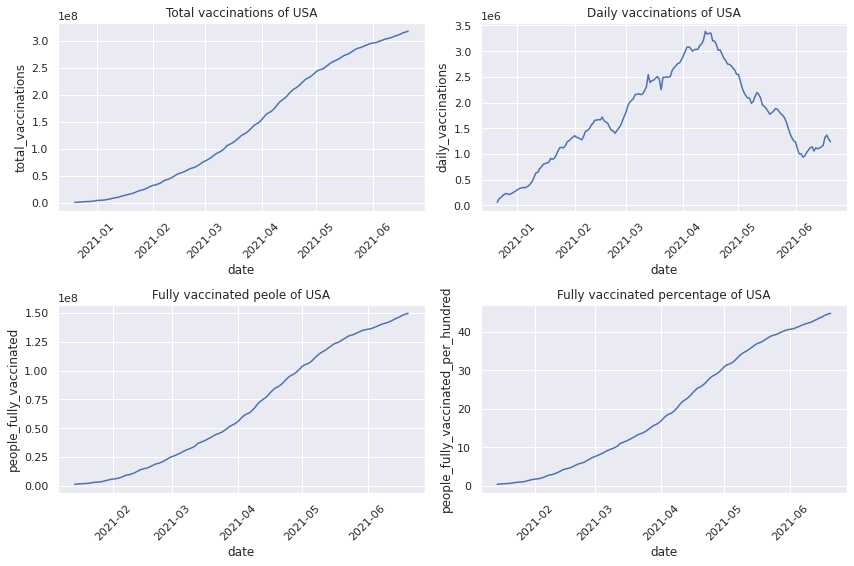

In [445]:
plt.figure(figsize=(12,8))
plt.subplot(2,2,1)
sns.lineplot(data=df9,x='date',y='total_vaccinations')
sns.set_theme(style='darkgrid')
plt.xticks(rotation=45)
plt.title("Total vaccinations of USA")
plt.subplot(2,2,2)
sns.lineplot(data=df9,x='date',y='daily_vaccinations')
plt.xticks(rotation=45)
plt.title("Daily vaccinations of USA")
plt.subplot(2,2,3)
sns.lineplot(data=df9,x='date',y='people_fully_vaccinated')
plt.xticks(rotation=45)
plt.title("Fully vaccinated peole of USA")
plt.subplot(2,2,4)
sns.lineplot(data=df9,x='date',y='people_fully_vaccinated_per_hundred')
plt.xticks(rotation=45)
plt.title("Fully vaccinated percentage of USA")
plt.tight_layout(pad=1.0)
plt.show()